<a href="https://colab.research.google.com/github/Ak1199/MLnow_2.0/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Assignment 1 of `ML.now()` course


`Univariate Linear Regression`

[Dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Author**:
 Apoorva Khairnar

## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/MLnow'

/content/drive/MyDrive/Colab Notebooks/MLnow


In [3]:
import os

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os

In [7]:
df = pd.read_csv('student-mat.csv', sep=';')

In [8]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [9]:
unidf = df[['G1', 'G3']]
unidf.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [12]:
unidf.to_csv('univariate_df.csv')

In [13]:
ls

Assignment_1.ipynb  univariate_df.csv
student-mat.csv     univariate_MathData_2.csv


## Data visualization

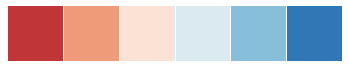

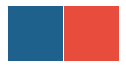

In [29]:
import seaborn as sns
sns.palplot(sns.color_palette('RdBu'))
pal = sns.color_palette('RdBu', 6)
pal.as_hex()

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
plot_colors = ['#1f618d', '#e74c3c']
sns.set_palette(plot_colors)
sns.palplot(sns.color_palette(plot_colors))

In [16]:
unidf.columns

Index(['G1', 'G3'], dtype='object')

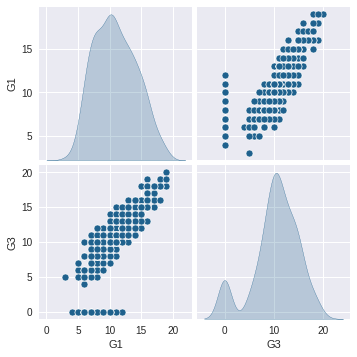

In [30]:
#pairplot for all the values

sns.pairplot(unidf, x_vars = ['G1', 'G3'], y_vars =  ['G1', 'G3'], diag_kind='kde')

## Data Splits

In [18]:
train_set = unidf.sample(frac=0.8, random_state=0) 
test_set = unidf.drop(train_set.index)

print(train_set.head())
print(test_set.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [19]:
print(train_set.shape)
print(test_set.shape)

(316, 2)
(79, 2)


In [20]:
#copy the train_set df for getting the features

trainFeatures = train_set.copy()
testFeatures = test_set.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [21]:
#G3 to labels

train_Labels = trainFeatures.pop('G3')
test_Labels = testFeatures.pop('G3')

print(train_Labels.head())
print(test_Labels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [22]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [23]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [24]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['mae', 'mse']
)

In [25]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = train_Labels, validation_data = (testFeatures, test_Labels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 20ms/step - loss: 23.9441 - mae: 23.9441 - mse: 641.1501 - val_loss: 25.3183 - val_mae: 25.3183 - val_mse: 714.5410
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 23.8261 - mae: 23.8261 - mse: 634.9969 - val_loss: 25.1936 - val_mae: 25.1936 - val_mse: 707.6810
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 23.7092 - mae: 23.7092 - mse: 628.9933 - val_loss: 25.0688 - val_mae: 25.0688 - val_mse: 700.8422
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 23.5914 - mae: 23.5914 - mse: 622.8937 - val_loss: 24.9442 - val_mae: 24.9442 - val_mse: 694.0557
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 23.4738 - mae: 23.4738 - mse: 616.8499 - val_loss: 24.8198 - val_mae: 24.8198 - val_mse: 687.3095
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 23.3564 - mae: 23.3564 - mse: 610.8734 - val_loss: 24.6953 - val_mae: 2

In [26]:
print(history)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


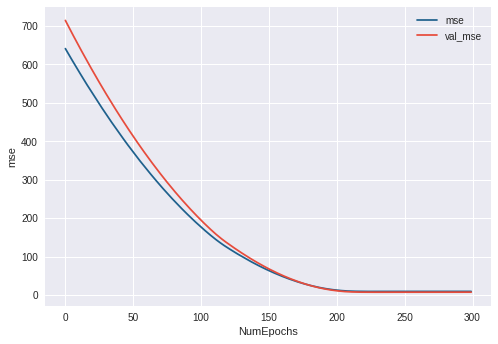

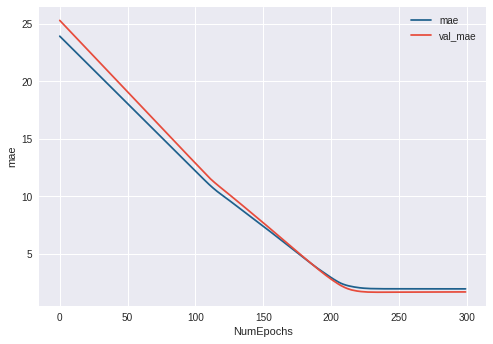

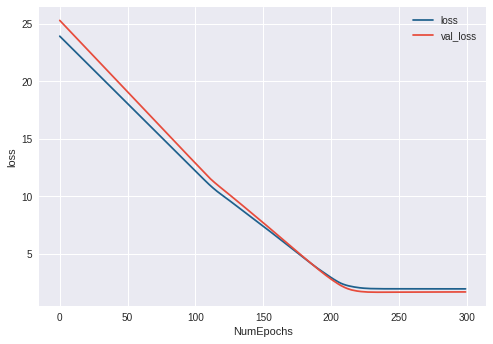

In [31]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [32]:
model.predict([1])

array([[2.8180008]], dtype=float32)

In [33]:
print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
temp_Preds = [1,2,3,4,5]
print(f'''

input List = {temp_Preds}


List of Predictions:
{model.predict(temp_Preds)}

List of Predictions (flattened out):
{model.predict(temp_Preds).flatten()}
''')

Prediction for input value 1: [[2.8180008]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.8180008]
 [3.6527414]
 [4.487482 ]
 [5.3222227]
 [6.1569633]]

List of Predictions (flattened out):
[2.8180008 3.6527414 4.487482  5.3222227 6.1569633]



In [34]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [35]:
testPreds = model.predict(testFeatures).flatten()

In [36]:
print(len(testPreds))
print(testPreds)

79
[13.669627   6.991703  11.165406  16.17385   16.17385   12.000146
 13.669627  17.84333   17.84333    8.661184  13.669627  12.834887
  8.661184   7.8264437  9.495925  12.834887  11.165406  15.339108
  7.8264437 10.330666  14.504368  12.834887  13.669627  15.339108
  7.8264437  7.8264437  8.661184  10.330666  12.000146  10.330666
 12.000146  12.834887  10.330666   6.991703   9.495925  12.000146
  7.8264437  8.661184  13.669627   9.495925   9.495925   7.8264437
 12.000146   6.991703  12.834887   7.8264437  7.8264437 11.165406
 12.834887  16.17385   12.000146  14.504368   9.495925  12.000146
 14.504368  12.000146  14.504368  12.000146  14.504368  11.165406
 12.000146   8.661184  15.339108   7.8264437 15.339108  11.165406
 15.339108  12.834887   8.661184   8.661184  12.000146  17.00859
 12.834887  15.339108  10.330666   7.8264437 10.330666   7.8264437
 11.165406 ]


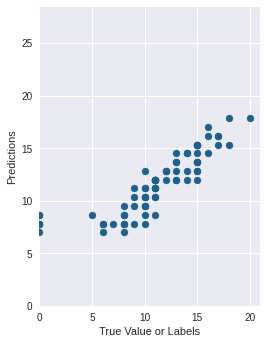

In [37]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(test_Labels, testPreds)

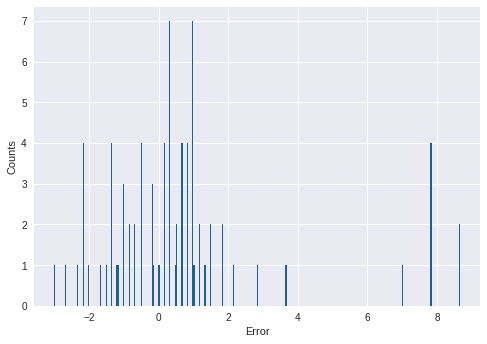

In [38]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, test_Labels, numEpochs)